In [2]:
#https://www.kaggle.com/c/digit-recognizer/data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#ASHIS KUMAR SAHU

In [4]:
df=pd.read_csv("mnist_train.csv")
df.head()

"""
#IF WE WANT TO USE THE SKLEARN AVAILABLE DATASET

from sklearn.datasets import fetch_openml

# Step 1: Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target
"""

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
l=df['label']
d=df.drop('label',axis=1)

In [6]:
l

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [7]:
d.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
d.shape

(42000, 784)

In [9]:
l.shape

(42000,)

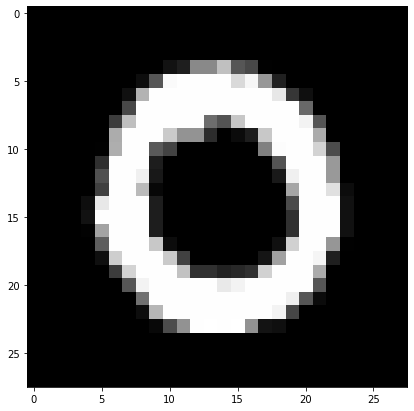

In [13]:
plt.figure(figsize=(7,7))
idx=1
grid_data=d.iloc[idx].values.reshape(28,28)
plt.imshow(grid_data,interpolation='none',cmap='gray')
plt.show()

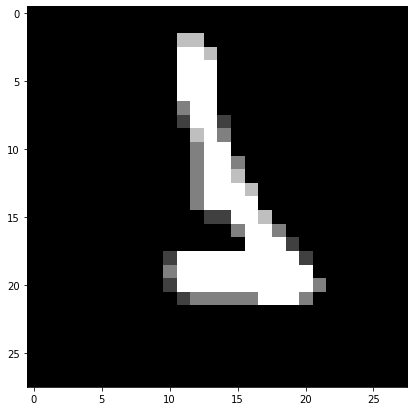

In [14]:
plt.figure(figsize=(7,7))
idx=60
grid_data=d.iloc[idx].values.reshape(28,28)
plt.imshow(grid_data,interpolation='none',cmap='gray')
plt.show()

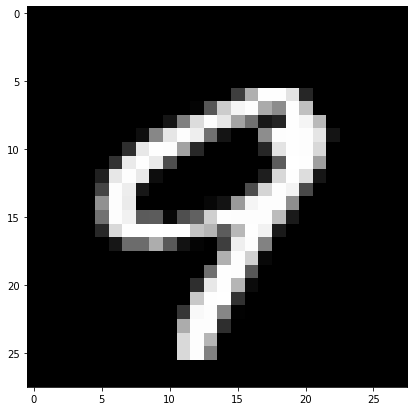

In [15]:
plt.figure(figsize=(7,7))
idx=100
grid_data=d.iloc[idx].values.reshape(28,28)
plt.imshow(grid_data,interpolation='none',cmap='gray')
plt.show()

In [16]:
#Visualization using PCA

- standadise the data
- covariance matrix
- eigen values and vectors
- best eigen vectors where spread is maximum

In [17]:
labels=l.head(15000)
data=d.head(15000)
data.shape

(15000, 784)

In [18]:
#1.standardize data
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
standardized_data.shape

(15000, 784)

In [19]:
standardized_data.T.shape,standardized_data.shape

((784, 15000), (15000, 784))

In [20]:
#2. find covariance matrix
cov_matrix=np.matmul(standardized_data.T,standardized_data)
cov_matrix.shape


(784, 784)

In [21]:
cov_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
from scipy.linalg import eigh
values,vectors=eigh(cov_matrix,eigvals=(782,783))
values

array([435532.55785282, 605719.29173629])

In [23]:
vectors.shape

(784, 2)

In [25]:
vectors.T.shape

(2, 784)

In [24]:
standardized_data.shape

(15000, 784)

In [26]:
new_data=np.matmul(vectors.T,standardized_data.T)
new_data.shape

(2, 15000)

In [27]:
labels.shape

(15000,)

In [28]:
type(new_data)

numpy.ndarray

In [29]:
type(labels)

pandas.core.series.Series

In [30]:
labels_array=labels.values.reshape(1,15000)
labels_array.shape

(1, 15000)

In [32]:
result=np.vstack((new_data,labels_array))
result.shape

(3, 15000)

In [33]:
result

array([[-5.5586608 ,  6.19363477, -1.90987794, ..., -2.14793723,
         3.20412249, -6.87896871],
       [-5.04355835, 19.30527806, -7.67877525, ..., -1.50726893,
        -6.53731291, -1.25625388],
       [ 1.        ,  0.        ,  1.        , ...,  8.        ,
         9.        ,  6.        ]])

In [34]:
result.T

array([[-5.5586608 , -5.04355835,  1.        ],
       [ 6.19363477, 19.30527806,  0.        ],
       [-1.90987794, -7.67877525,  1.        ],
       ...,
       [-2.14793723, -1.50726893,  8.        ],
       [ 3.20412249, -6.53731291,  9.        ],
       [-6.87896871, -1.25625388,  6.        ]])

In [35]:
new_cordinates=result.T
df=pd.DataFrame(new_cordinates,columns=['1st_principal','2nd_principal','label'])
df.head()

,1st_principal,2nd_principal,label
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0


C:\Users\sahua\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


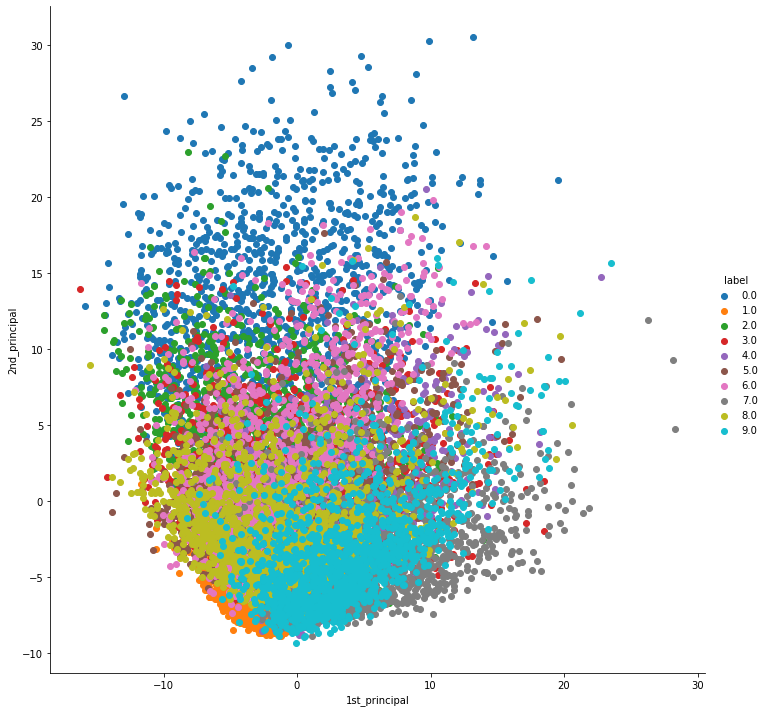

In [36]:
import seaborn as sns
sns.FacetGrid(df,hue='label',size=10).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

In [37]:
#PCA using scikit_learn
from sklearn import decomposition
pca=decomposition.PCA()

In [38]:
pca.n_components=2
pca_data=pca.fit_transform(standardized_data)
pca_data

array([[-5.04357738, -5.55863038],
       [19.30528288,  6.19351639],
       [-7.6787646 , -1.91013734],
       ...,
       [-1.50724847, -2.14817165],
       [-6.53730913,  3.20457213],
       [-1.25625498, -6.87942316]])

In [39]:
pca_data.shape

(15000, 2)

In [40]:
pca_data1=np.vstack((pca_data.T,labels)).T
pca_data1.shape

(15000, 3)

In [41]:
df1=pd.DataFrame(pca_data1,columns=['1st_principal','2nd_principal','label'])
df1.head()

,1st_principal,2nd_principal,label
0,-5.043577,-5.558630,1.0
1,19.305283,6.193516,0.0
2,-7.678765,-1.910137,1.0
3,-0.464849,5.525565,4.0
4,26.644286,6.366429,0.0


C:\Users\sahua\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


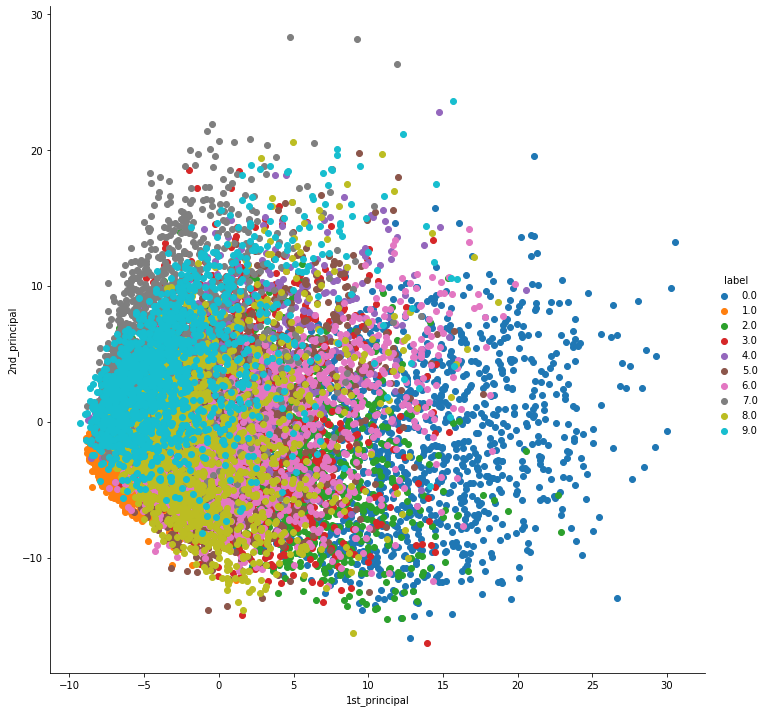

In [42]:
import seaborn as sns
sns.FacetGrid(df1,hue='label',size=10).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

# dimensionality reduction(not for visualization)

In [44]:
from sklearn import decomposition
pca=decomposition.PCA()
pca.n_components=784
pca_data=pca.fit_transform(standardized_data)
pca_data

array([[-5.04355835e+00, -5.55866080e+00,  3.56339147e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.93052781e+01,  6.19363477e+00,  1.37625156e+00, ...,
        -2.02452831e-15,  9.20641931e-16, -8.54378277e-17],
       [-7.67877525e+00, -1.90987794e+00,  2.35419316e+00, ...,
        -3.71901685e-16,  1.10413089e-15,  1.25627314e-16],
       ...,
       [-1.50726893e+00, -2.14793723e+00,  4.20128541e-02, ...,
        -1.35337468e-17, -2.05578497e-17, -1.17979237e-17],
       [-6.53731291e+00,  3.20412249e+00, -2.76389304e+00, ...,
        -4.16776082e-17, -3.30017054e-18, -8.70758735e-18],
       [-1.25625388e+00, -6.87896871e+00,  1.61118734e+00, ...,
        -2.39680069e-17, -6.98098414e-18, -2.47378316e-17]])

In [45]:
pca_data.shape

(15000, 784)

In [46]:
pecentage_var_explained=pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained=np.cumsum(pecentage_var_explained)

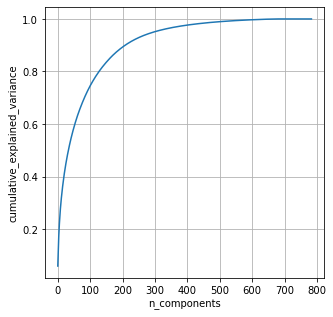

In [48]:
plt.figure(1,figsize=(5,5))
plt.plot(cum_var_explained)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cumulative_explained_variance')
plt.show()

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [51]:
df=pd.read_csv("mnist_train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
X=df.drop('label',axis=1)
y=df['label']

In [53]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [54]:
X_scaled.shape

(42000, 784)

In [55]:
y.shape

(42000,)

In [56]:
pca=PCA()
pca.fit(X_scaled)
explained_variance_ratio=pca.explained_variance_ratio_
cumulative_explained_variance=np.cumsum(explained_variance_ratio)

In [57]:
cumulative_explained_variance

array([0.05747953, 0.09859644, 0.13642512, 0.16582374, 0.19138813,
       0.21368657, 0.2332121 , 0.25092815, 0.26655475, 0.28080431,
       0.2944144 , 0.3066398 , 0.31799717, 0.32912807, 0.33963118,
       0.34975443, 0.35926746, 0.36861261, 0.37768519, 0.38653847,
       0.39492754, 0.40304781, 0.41079942, 0.41832254, 0.42559944,
       0.432587  , 0.43949155, 0.44614078, 0.45244753, 0.45861055,
       0.46471977, 0.47069014, 0.47646297, 0.4821998 , 0.48784802,
       0.49331123, 0.49870554, 0.50394915, 0.50899758, 0.51388288,
       0.51870532, 0.52346433, 0.52806441, 0.53264069, 0.53713653,
       0.54160375, 0.54604212, 0.55041049, 0.55473762, 0.55900789,
       0.56320058, 0.56732239, 0.57134699, 0.57534133, 0.57929025,
       0.5831983 , 0.58699728, 0.59072182, 0.59440595, 0.59806318,
       0.60159596, 0.60510684, 0.60856097, 0.61197491, 0.61535276,
       0.61871752, 0.62203462, 0.62533187, 0.62853203, 0.63169979,
       0.63482674, 0.63794535, 0.64102748, 0.64406024, 0.64707

In [58]:
explained_variance_ratio

array([5.74795336e-02, 4.11169103e-02, 3.78286715e-02, 2.93986212e-02,
       2.55643921e-02, 2.22984433e-02, 1.95255247e-02, 1.77160531e-02,
       1.56266017e-02, 1.42495571e-02, 1.36100884e-02, 1.22254076e-02,
       1.13573634e-02, 1.11309029e-02, 1.05031053e-02, 1.01232575e-02,
       9.51302738e-03, 9.34514435e-03, 9.07258876e-03, 8.85327331e-03,
       8.38907114e-03, 8.12027039e-03, 7.75160752e-03, 7.52311857e-03,
       7.27690355e-03, 6.98755959e-03, 6.90454706e-03, 6.64923638e-03,
       6.30675038e-03, 6.16301289e-03, 6.10922106e-03, 5.97037089e-03,
       5.77283590e-03, 5.73682340e-03, 5.64821911e-03, 5.46321734e-03,
       5.39430432e-03, 5.24361113e-03, 5.04843259e-03, 4.88530211e-03,
       4.82243943e-03, 4.75900896e-03, 4.60007666e-03, 4.57628685e-03,
       4.49583855e-03, 4.46721905e-03, 4.43836948e-03, 4.36836795e-03,
       4.32712937e-03, 4.27026938e-03, 4.19269307e-03, 4.12180430e-03,
       4.02460610e-03, 3.99434033e-03, 3.94891257e-03, 3.90805004e-03,
      

In [59]:
threshold=0.90
n_components=np.argmax(cumulative_explained_variance>=threshold)+1
n_components

229